In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
eth = pd.read_excel("ETH.xlsx")

In [3]:
eth["Date"] = pd.to_datetime(eth["Date"])

In [4]:
eth.sort_values(by="Date", inplace=True)

In [5]:
eth = eth.reset_index().drop(columns = "index")

## Code for stacked LSTM

In [87]:
df = eth["price"]

In [86]:
#df_trn = df_trn["price"]
#df_tst = df_tst["price"]

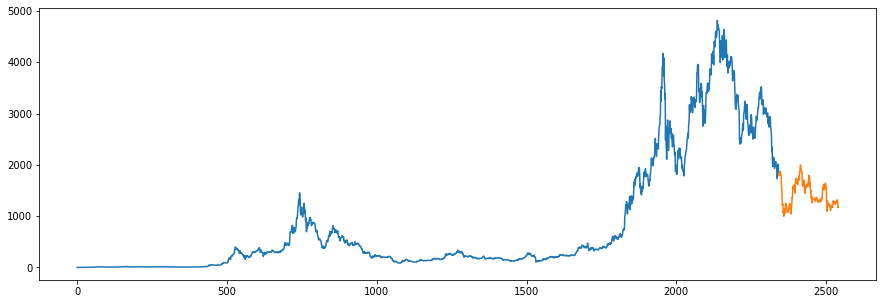

In [79]:
#fig, ax = plt.subplots(figsize = (15,5))
#ax.plot(df_trn)
#ax.plot(df_tst)
#plt.show()

In [102]:
#Scale data
scaler=MinMaxScaler(feature_range=(0,1))
dfs =scaler.fit_transform(np.array(df).reshape(-1,1))
#dfs_tst =scaler.fit_transform(np.array(df_tst).reshape(-1,1))  

In [103]:
# splitting dataset into train and test split
dfs_train = dfs[:-91]
dfs_test = dfs[-91:]

In [109]:
# creating an appropriate dataset for LSTM
#number of consecutive time steps in a time series that are considered as input for the LSTM

def create_input_data(data, time_step):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0] ### subset i to time step row and 0th column
        X.append(a)
        Y.append(data[(i+time_step), 0])
    return np.array(X), np.array(Y)

In [111]:
# reshape into X=t,t+1,t+2,t+3,...t+30 and Y=t+31
time_step = 30 
X_train, Y_train = create_input_data(dfs_train, time_step)
X_test, Y_test = create_input_data(dfs_test, time_step)

In [112]:
print(X_train.shape),
print(Y_train.shape)

(2420, 30)
(2420,)


In [113]:
# Reshape from [samples, timesteps] to [samples, timesteps, features]--> converting from 2D to 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [114]:
### Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
38/38 [==============================] - 10s 89ms/step - loss: 0.0103 - val_loss: 0.0014
Epoch 2/200
38/38 [==============================] - 2s 45ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/200
38/38 [==============================] - 2s 46ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/200
38/38 [==============================] - 2s 45ms/step - loss: 0.0014 - val_loss: 9.6933e-04
Epoch 5/200
38/38 [==============================] - 2s 44ms/step - loss: 0.0013 - val_loss: 9.3120e-04
Epoch 6/200
38/38 [==============================] - 2s 44ms/step - loss: 0.0012 - val_loss: 9.3557e-04
Epoch 7/200
38/38 [==============================] - 2s 44ms/step - loss: 0.0013 - val_loss: 7.9722e-04
Epoch 8/200
38/38 [==============================] - 2s 46ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 9/200
38/38 [==============================] - 2s 47ms/step - loss: 8.7539e-04 - val_loss: 7.9476e-04
Epoch 10/200
38/38 [==============================] - 2s 46ms/step - loss: 

38/38 [==============================] - 2s 49ms/step - loss: 3.1834e-04 - val_loss: 3.0563e-04
Epoch 77/200
38/38 [==============================] - 2s 46ms/step - loss: 2.4420e-04 - val_loss: 2.4462e-04
Epoch 78/200
38/38 [==============================] - 2s 47ms/step - loss: 2.3339e-04 - val_loss: 2.4054e-04
Epoch 79/200
38/38 [==============================] - 2s 44ms/step - loss: 2.3437e-04 - val_loss: 2.2323e-04
Epoch 80/200
38/38 [==============================] - 2s 45ms/step - loss: 2.4207e-04 - val_loss: 2.9088e-04
Epoch 81/200
38/38 [==============================] - 2s 44ms/step - loss: 2.4042e-04 - val_loss: 3.2967e-04
Epoch 82/200
38/38 [==============================] - 2s 45ms/step - loss: 2.3233e-04 - val_loss: 2.2488e-04
Epoch 83/200
38/38 [==============================] - 2s 45ms/step - loss: 2.4496e-04 - val_loss: 2.4355e-04
Epoch 84/200
38/38 [==============================] - 2s 44ms/step - loss: 2.8300e-04 - val_loss: 5.9303e-04
Epoch 85/200
38/38 [============

Epoch 151/200
38/38 [==============================] - 2s 46ms/step - loss: 2.5015e-04 - val_loss: 2.4977e-04
Epoch 152/200
38/38 [==============================] - 2s 47ms/step - loss: 2.3549e-04 - val_loss: 2.1354e-04
Epoch 153/200
38/38 [==============================] - 2s 49ms/step - loss: 2.2738e-04 - val_loss: 3.3805e-04
Epoch 154/200
38/38 [==============================] - 2s 49ms/step - loss: 2.3667e-04 - val_loss: 2.1055e-04
Epoch 155/200
38/38 [==============================] - 2s 49ms/step - loss: 2.3437e-04 - val_loss: 2.2639e-04
Epoch 156/200
38/38 [==============================] - 2s 48ms/step - loss: 2.2714e-04 - val_loss: 2.0612e-04
Epoch 157/200
38/38 [==============================] - 2s 47ms/step - loss: 2.2449e-04 - val_loss: 2.0894e-04
Epoch 158/200
38/38 [==============================] - 2s 46ms/step - loss: 2.4064e-04 - val_loss: 3.4208e-04
Epoch 159/200
38/38 [==============================] - 2s 47ms/step - loss: 2.7126e-04 - val_loss: 2.0917e-04
Epoch 160/

In [145]:
# prediction for next 30 days
temp_input = dfs_train[-30:, 0].tolist() # last 30 days of the train data
x_input = dfs_train[-30:, 0].reshape(1,-1) #first input data


time_step =30
last_output=[]
n_steps=len(dfs_test)
i=0
while(i<n_steps):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        last_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, time_step,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        last_output.extend(yhat.tolist())
        i=i+1
    

print(last_output) 

[[0.305143266916275], [0.304244726896286], [0.3024381995201111], [0.3004874289035797], [0.2983894646167755], [0.2962475121021271], [0.2941329777240753], [0.29207471013069153], [0.2900591194629669], [0.2880666255950928], [0.2860698401927948], [0.2840558886528015], [0.28201061487197876], [0.2799328565597534], [0.27782705426216125], [0.2756993770599365], [0.2735585570335388], [0.27141526341438293], [0.2692800462245941], [0.2671566605567932], [0.2650548219680786], [0.2629777789115906], [0.26093146204948425], [0.2589181363582611], [0.25693464279174805], [0.2549765408039093], [0.25303420424461365], [0.25111061334609985], [0.24919427931308746], [0.24728500843048096], [0.24538545310497284], [0.24349413812160492], [0.2416120171546936], [0.23973917961120605], [0.2378758043050766], [0.23602195084095], [0.23417781293392181], [0.2323431372642517], [0.23051828145980835], [0.22870314121246338], [0.22689783573150635], [0.22510239481925964], [0.22331684827804565], [0.22154106199741364], [0.219774976372

In [131]:
day_new=np.arange(len(dfs_train)-150, len(dfs_train)+1)
day_pred=np.arange(len(dfs_train)+1, len(dfs_train) + len(dfs_test)+1)

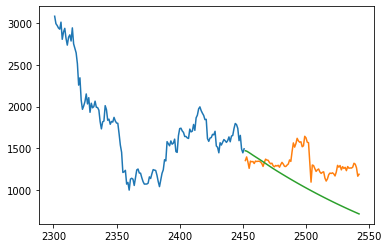

In [144]:
plt.plot(day_new,scaler.inverse_transform(dfs_train[-151:]))
plt.plot(day_pred,scaler.inverse_transform(dfs_test))
plt.plot(day_pred,scaler.inverse_transform(last_output))
